# O11e - Optical polarisation
Erzsebet-Ilona Kundi 3767559, Anas Roumeih 3766647 - Group 31.

26.04.2023


In [ ]:
import sympy as smp
from tabulate import tabulate
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

from scipy import stats
from scipy import optimize
from scipy.optimize import curve_fit
from scipy import fftpack
from scipy.integrate import cumulative_trapezoid
from scipy.signal import find_peaks
from scipy.signal import savgol_filter

## Task 1

Measure the light intensity as function of the analyser angle θ for linear polarised light that
passed through a λ/4 – plate under angles of (a) φ = 0◦, (b) φ = 30◦ and (c) φ = 45◦.
Compare to the calculations from the first task by making nonlinear fits to the data.

During the experiment, we measured the voltage generated in photodiode, which is proportional to the intensity of light.

In [ ]:
# importing measurement data
df1 = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/main/O11e%20-%20task%201.csv')
deg = np.array(df1['deg'])
theta = deg*np.pi/180
task1_0 = np.array(df1['0'])
task1_30 = np.array(df1['30'])
task1_45 = np.array(df1['45'])

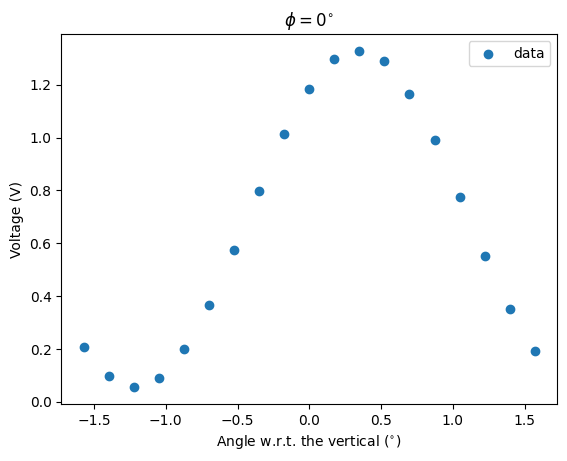

In [ ]:
plt.scatter(theta, task1_0, label = 'data')
plt.title('$\phi = 0^{\circ}$')
plt.xlabel('Angle w.r.t. the vertical ($^{\circ}$)')
plt.legend()
plt.ylabel('Voltage (V)')
plt.show()

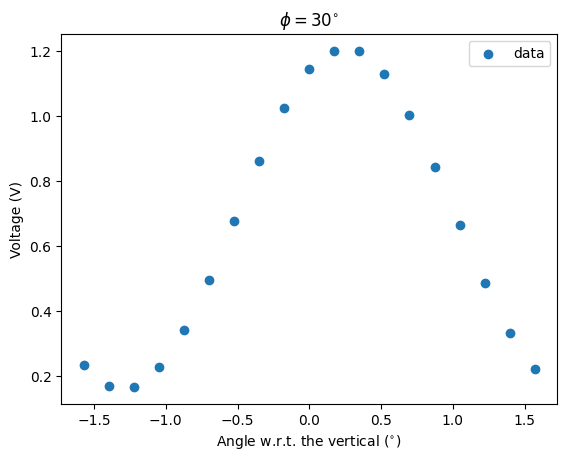

In [ ]:
plt.scatter(theta, task1_30, label = 'data')
plt.title('$\phi = 30^{\circ}$')
plt.xlabel('Angle w.r.t. the vertical ($^{\circ}$)')
plt.legend()
plt.ylabel('Voltage (V)')
plt.show()

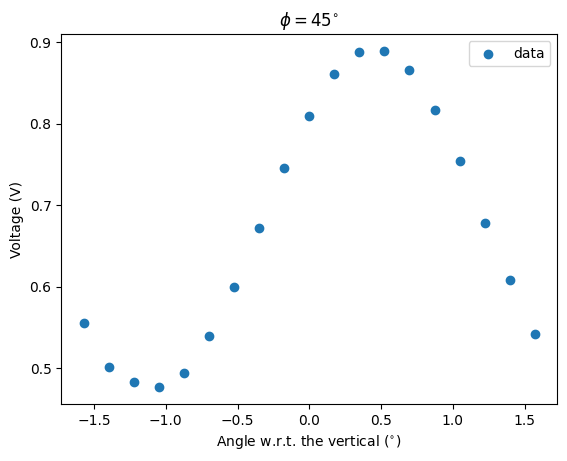

In [ ]:
plt.scatter(theta, task1_45, label = 'data')
plt.title('$\phi = 45^{\circ}$')
plt.xlabel('Angle w.r.t. the vertical ($^{\circ}$)')
plt.legend()
plt.ylabel('Voltage (V)')
plt.show()

## Task 2
Characterise the state of polarisation of three unknown black boxes in front of a light source
using appropriate measurements.

### BB1
For the first black box we first checked if there was an intensity variation changing the analyzer angle, without inserting anything inbetween. We found that there was a angular dependence, but the intensity never dropped to 0. So we inserted the quarter-wave plate with its fast axis aligned with the minimum position of the intensity without the plate. By turning the analyzer to different angles, we found that the minimum of the intensity got shifted after inserting the quarter-wave plate, but it still never dropped to 0.

So we concluded that BB1 creates a mixture of elliptically polarised and unpolarised light.

The angular dependence can be seen on the plot below:

In [ ]:
df2 = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/main/O11e%20-%20BB1.csv')
BB1 = np.array(df2['min. at 3'])

In [ ]:
def hmm(theta,alpha,I0):
  return I0*(np.cos(theta-alpha)**2 + np.cos(theta+alpha)**2)

In [ ]:
poptBB1, pcovBB1 = curve_fit(hmm,theta,BB1,p0 = [0.1,0.1])
thetas = np.linspace(-np.pi/2,np.pi/2,1000)
BB1_fit = np.array(linpol(thetas,poptBB1[0],poptBB1[1]))

Text(0.5, 1.0, 'Black box 1')

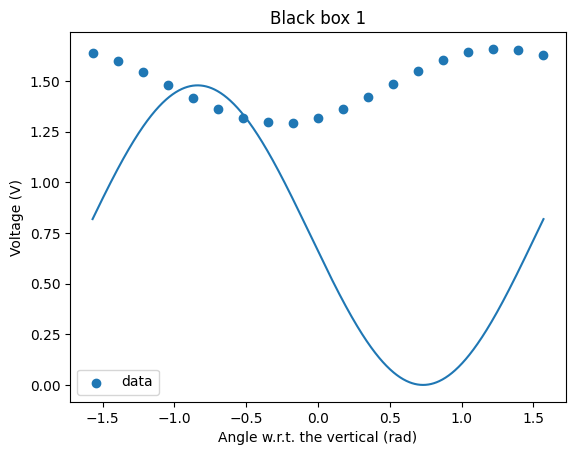

In [ ]:
plt.scatter(theta,BB1,label = 'data')
plt.plot(thetas,BB1_fit)
plt.xlabel('Angle w.r.t. the vertical (rad)')
plt.legend()
plt.ylabel('Voltage (V)')
plt.title('Black box 1')

### BB2
For the second black box we found that there was a angular dependence of the intensity with the analyzer alone, and the intensity dropped to 0 in a certain position.
So we concluded that BB2 is a simple linear polarizer, with a polarizer angle of 0.096 rad ($5.5 ^\circ$) with respect to the vertical (where the intensity has its maximum). The experiment clearly agrees with theory here, as the fitted function follows equation !! from Task 0:

$I = I_0cos^2(θ-α)$

In [ ]:
df3 = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/main/O11e%20-%20BB2.csv')
BB2 = np.array(df3['ZERO'])

In [ ]:
def linpol(theta,alpha,I0):
  return I0*(np.cos(theta-alpha))**2

In [ ]:
poptBB2, pcovBB2 = curve_fit(linpol,theta,BB2,p0 = [0.1,0.8])
BB2_fit = np.array(linpol(thetas,poptBB2[0],poptBB2[1]))

In [ ]:
max1 = np.max(BB2_fit)
max1_index = np.argmax(BB2_fit)
max_pos_BB2 = np.round(thetas[max1_index],3)

0.096

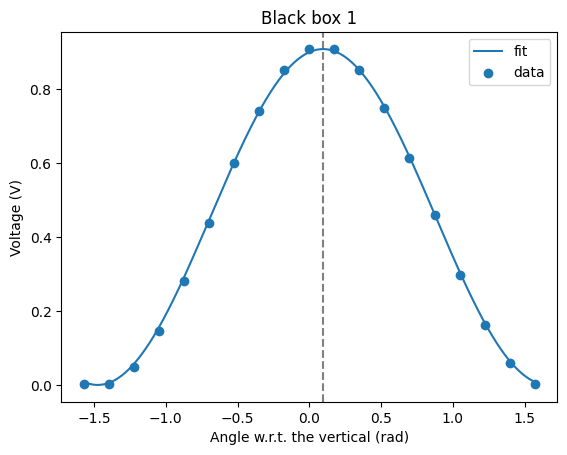

In [ ]:
plt.plot(thetas,BB2_fit, label = 'fit')
plt.scatter(theta,BB2, label = 'data')
plt.xlabel('Angle w.r.t. the vertical (rad)')
plt.legend()
plt.ylabel('Voltage (V)')
plt.title('Black box 1')
plt.axvline(max_pos_BB2, ls = '--', color = 'gray', zorder = -1)

### BB3

For the third black box we found that there was an angular dependence of intensity with analyzer alone, but it never dropped to zero. So we inserted the quarter-wave plate with its fast axis aligned with the minimum position of the intensity without the plate. By turning the analyzer to different angles, we found that at a certain angle, the intensity dropped to 0. So after passing the quarter-wave plate, the light became linearly polarized, with an angle of -0.492 rad (approx.$-28^{\circ}$) with respect to the vertical, so it follows the same formula as BB2.
Without the quarter-wave plate, the intensity had a minimum at 0.61 rad (approx. $35^{\circ}$).

So we concluded that BB3 creates elliptically polarized light.


In [ ]:
df4 = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/main/O11e%20-%20BB3.csv')
BB3 = np.array(df4['min at 35 '])

In [ ]:
poptBB3, pcovBB3 = curve_fit(linpol,theta,BB3,p0 = [0.1,0.8])
BB3_fit = np.array(linpol(thetas,poptBB3[0],poptBB3[1]))

In [ ]:
max2 = np.max(BB3_fit)
max2_index = np.argmax(BB3_fit)
max_pos_BB3 = np.round(thetas[max2_index],3)
max_pos_BB3

-0.492

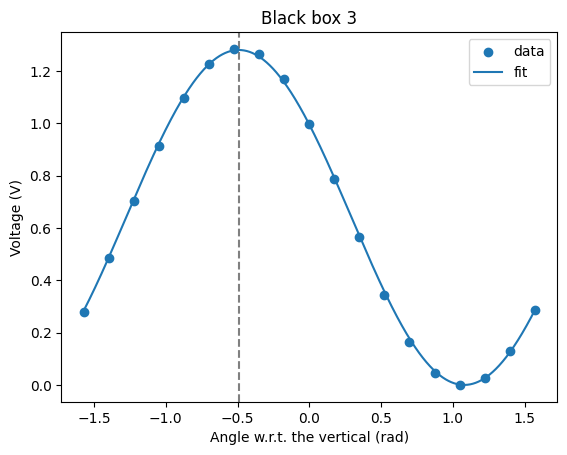

In [ ]:
plt.scatter(theta,BB3,label='data')
plt.plot(thetas,BB3_fit,label='fit')
plt.xlabel('Angle w.r.t. the vertical (rad)')
plt.legend()
plt.ylabel('Voltage (V)')
plt.title('Black box 3')
plt.axvline(max_pos_BB3, ls = '--', color = 'gray', zorder = -1)